# 算法原理

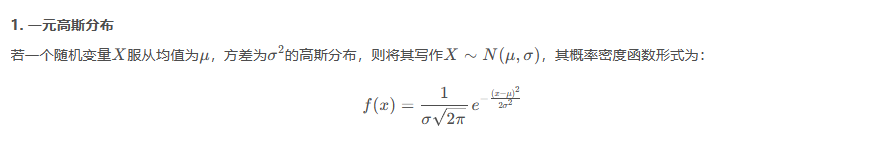
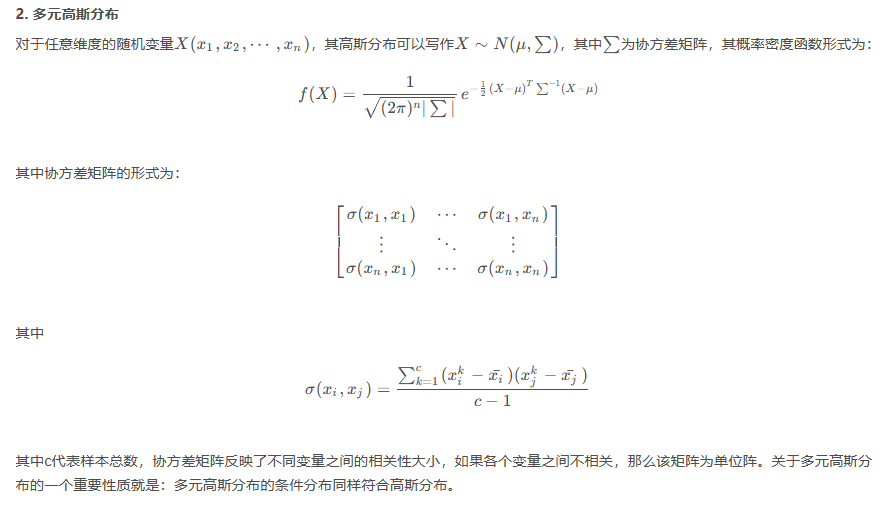
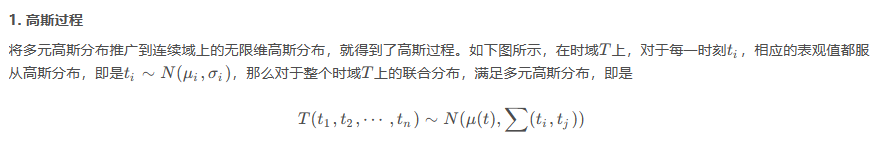
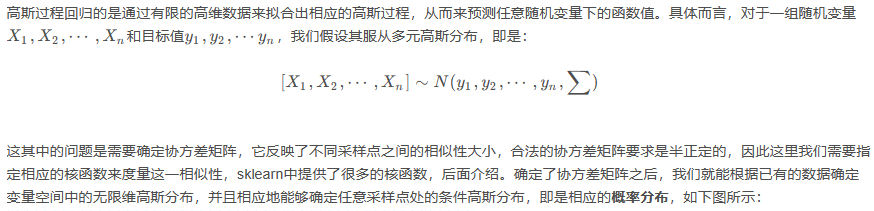

# 数据准备

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

特征 说明

CRIM 城镇人均犯罪率

ZN 大于25,000平方英尺的地块划分为住宅用地的比例

INDUS 每个城镇非零售业务的比例

CHAS 查尔斯河虚拟变量（如果 = 1则为河; =0则不为河）

NOX 一氧化氮浓度（每千万）

RM 每间住宅的平均房间数

AGE 自住房屋是在1940年之前建造的比例

DIS 到加州五个就业中心的加权距离

RAD 对径向高速公路的可达性指数

TAX 每10,000美元的全价物业税

PTRATIO 城镇的学生与教师比例

B 1000（Bk-0.63）^ 2其中Bk是城镇的黑人的比例

LSTAT 低社会阶层人口比例％

MEDV 以1000美元为单位的自住房屋的中位数价格

In [2]:
#读取数据
data = pd.read_csv("../data/boston_housing_data.csv")
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   

   PIRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
#准备数据
data = data.dropna()
y = data['MEDV']
x = data.drop(['MEDV'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

# 模型训练

In [4]:
#回归模型、参数
model = GaussianProcessRegressor(kernel=RBF(10, (1e-2, 1e2)))

# 训练模型
model.fit(x_train, y_train)

GaussianProcessRegressor(kernel=RBF(length_scale=10))

# 模型保存

In [5]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../outputs/best_models/gpr.pkl')

# 加载模型
model = joblib.load('../outputs/best_models/gpr.pkl')

In [6]:
# 法二
import pickle

with open('../outputs/best_models/gpr.pkl', 'wb') as f:
    pickle.dump(model, f)

#读取Model
with open('../outputs/best_models/gpr.pkl', 'rb') as f:
    model = pickle.load(f)

# 模型预测

In [7]:
prediction = model.predict(x_test)

In [8]:
# 计算R2，均方差
r2 = r2_score(y_test, prediction)
mse = np.sqrt(mean_squared_error(y_test, prediction))

In [9]:
print("R2为：", r2)
print("MSE为：", mse)

R2为： -1.2251619274209387
MSE为： 12.044894094723917
